# Tutorial No. 1

## 1. Import Packages

In [200]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
import keras.layers as layers
from keras.utils import to_categorical
from keras import optimizers
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
import numpy as np


## 2. Load Data

In [201]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Change labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


## 3. Define Parameters 

In [364]:
num_of_clss = 10           # number of classes
hidden_size = 10           # number of neurons in the hidden layer
lr = 0.001 #usually start from 10^-3                  # learning rate 
beta_1 =  0.9 #momentum speed usually 0.9               # beta 1 - for adam optimizer
beta_2 =  0.99 # divide the values in squre grads usually 0.99              # beta 2 - for adam optimizer
epsilon = 1*np.exp(-7)        # epsilon - for adam optimizer
epochs = 10                # number of epochs how many times iterate over the data 
bs = 64  #usually multiply by 2 16 32 64 128 # bach calc loss update params                 # batch size


## 4. Build 2 Layers Network

In [365]:
from keras.layers import Activation, Dense , Flatten
in_dim = 28*28

model = Sequential()
model.add(Flatten())
model.add(Dense(hidden_size, input_dim=in_dim))
model.add(Activation('relu'))
model.add(Dense(num_of_clss, input_dim=in_dim))
model.add(Activation('softmax'))


##  5. Train the Model

In [366]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 119us/step - loss: 8.8880 - acc: 0.4385 - val_loss: 7.5484 - val_acc: 0.5200
Epoch 2/10
42000/42000 [==============================] - 2s 59us/step - loss: 7.2001 - acc: 0.5456 - val_loss: 6.9843 - val_acc: 0.5609
Epoch 3/10
42000/42000 [==============================] - 2s 58us/step - loss: 7.0006 - acc: 0.5605 - val_loss: 7.4082 - val_acc: 0.5329
Epoch 4/10
42000/42000 [==============================] - 2s 57us/step - loss: 6.9644 - acc: 0.5630 - val_loss: 7.0671 - val_acc: 0.5552
Epoch 5/10
42000/42000 [==============================] - 2s 58us/step - loss: 6.9261 - acc: 0.5661 - val_loss: 7.0346 - val_acc: 0.5594
Epoch 6/10
42000/42000 [==============================] - 2s 58us/step - loss: 4.8911 - acc: 0.5130 - val_loss: 1.6097 - val_acc: 0.4469
Epoch 7/10
42000/42000 [==============================] - 2s 58us/step - loss: 1.5253 - acc: 0.4709 - val_loss: 1.4384 - val_ac

## 6. Visualize

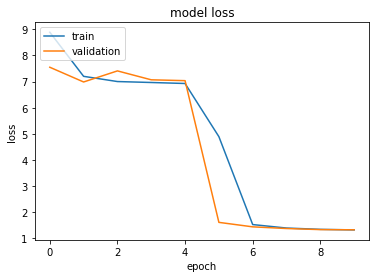

In [367]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()


## 7. Model Evaluation

In [368]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test loss: 1.3510176461219787
test accuracy: 0.5156


## 8. Predict on Test Set

Normalized confusion matrix
[[95.4  0.1  0.   2.9  0.7  0.   0.2  0.   0.7  0. ]
 [ 4.4 91.3  0.   4.1  0.2  0.   0.   0.   0.   0. ]
 [99.2  0.1  0.   0.6  0.   0.   0.1  0.   0.   0. ]
 [19.4  0.5  0.  78.9  0.9  0.   0.2  0.   0.1  0. ]
 [97.2  0.   0.   2.4  0.   0.1  0.1  0.   0.2  0. ]
 [13.5  0.   0.   0.   0.  81.9  0.   4.   0.1  0.5]
 [97.2  0.1  0.   1.3  0.3  0.   0.2  0.   0.9  0. ]
 [18.6  0.   0.   0.   0.   2.4  0.  79.   0.   0. ]
 [13.2  0.1  0.   0.5  0.   0.3  2.4  0.1 83.4  0. ]
 [97.6  0.   0.   0.   0.   0.7  0.   1.6  0.   0.1]]
[[954   1   0  29   7   0   2   0   7   0]
 [ 44 913   0  41   2   0   0   0   0   0]
 [992   1   0   6   0   0   1   0   0   0]
 [194   5   0 789   9   0   2   0   1   0]
 [972   0   0  24   0   1   1   0   2   0]
 [135   0   0   0   0 819   0  40   1   5]
 [972   1   0  13   3   0   2   0   9   0]
 [186   0   0   0   0  24   0 790   0   0]
 [132   1   0   5   0   3  24   1 834   0]
 [976   0   0   0   0   7   0  16   0   1]]


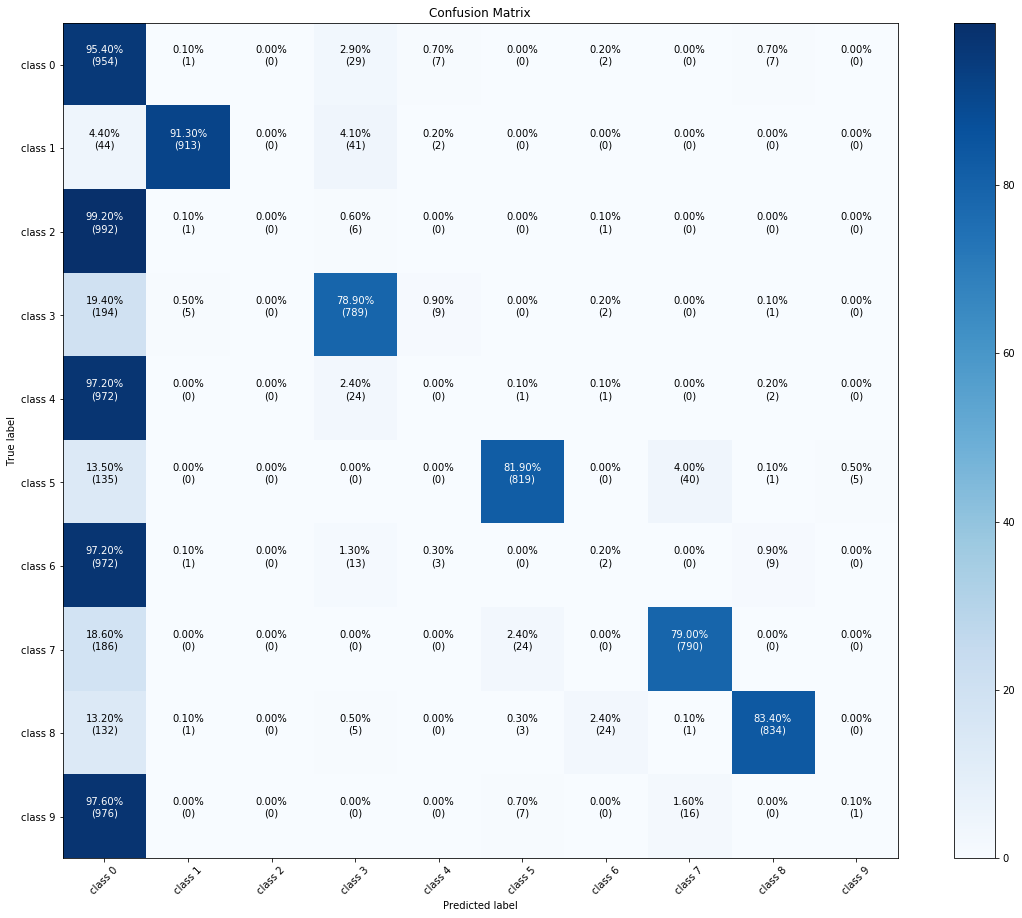

In [369]:
y_pred = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


## 9. Summerize 

In [370]:
# Summerize the model arhiteture and parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_66 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 10)                7850      
_________________________________________________________________
activation_101 (Activation)  (None, 10)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 10)                110       
_________________________________________________________________
activation_102 (Activation)  (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## 10. Save the Model with the Learned Weights

In [291]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


## 11. Load Saved Model

In [292]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


## 12. Predict using Loaded Model 

Normalized confusion matrix
[[88.8  0.3  0.9  2.5  0.4  0.   5.7  0.   1.4  0. ]
 [ 2.2 94.1  0.8  2.4  0.3  0.   0.   0.   0.2  0. ]
 [16.   0.1 66.7  0.4 11.3  0.   4.8  0.   0.6  0.1]
 [18.9  1.2  0.6 73.9  3.4  0.   1.6  0.   0.4  0. ]
 [13.6  0.  10.1  1.7 68.3  0.   5.8  0.   0.5  0. ]
 [ 1.6  0.   0.   0.1  0.  88.9  0.   5.2  0.6  3.6]
 [34.3  0.2  8.6  0.9 11.1  0.  42.6  0.   2.3  0. ]
 [ 1.2  0.   0.   0.   0.   2.1  0.  92.1  0.   4.6]
 [ 1.5  0.1  0.8  0.5  0.3  0.2  0.3  0.6 95.6  0.1]
 [ 1.2  0.   0.   0.   0.   1.5  0.   3.4  0.2 93.7]]
[[888   3   9  25   4   0  57   0  14   0]
 [ 22 941   8  24   3   0   0   0   2   0]
 [160   1 667   4 113   0  48   0   6   1]
 [189  12   6 739  34   0  16   0   4   0]
 [136   0 101  17 683   0  58   0   5   0]
 [ 16   0   0   1   0 889   0  52   6  36]
 [343   2  86   9 111   0 426   0  23   0]
 [ 12   0   0   0   0  21   0 921   0  46]
 [ 15   1   8   5   3   2   3   6 956   1]
 [ 12   0   0   0   0  15   0  34   2 937]]


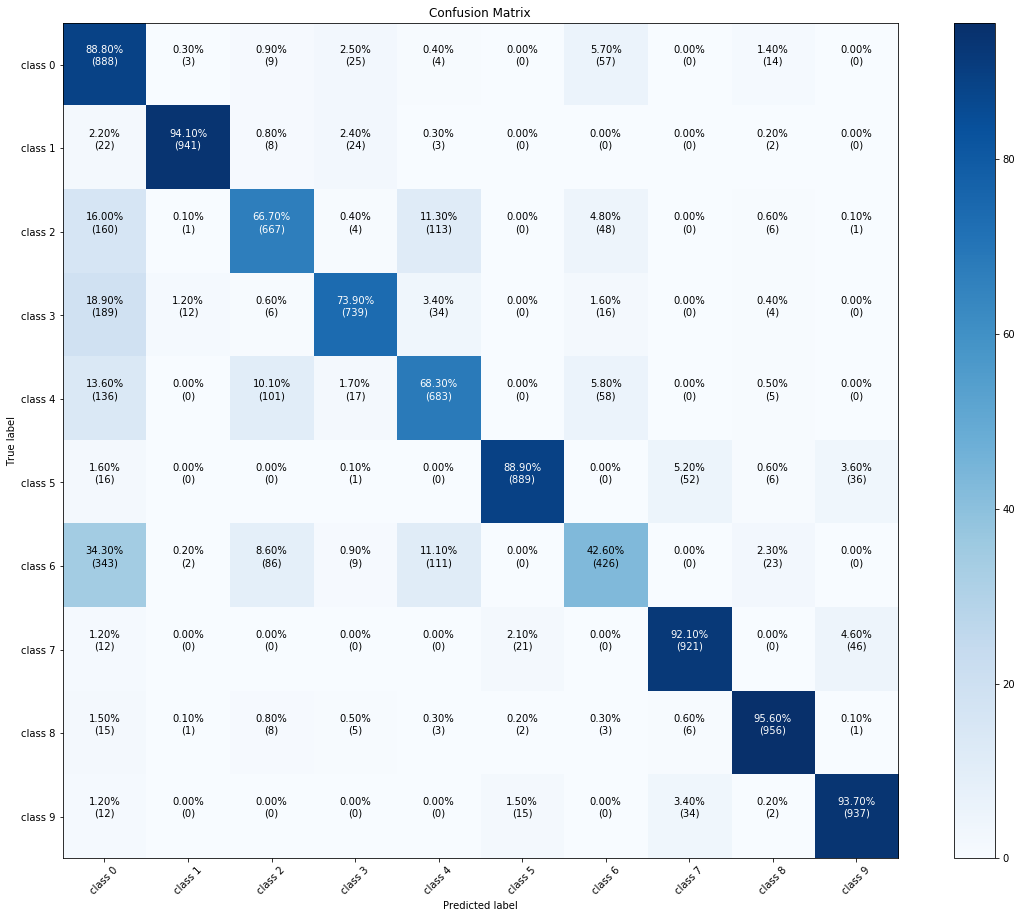

In [293]:
y_pred = loaded_model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)
